## Our First Neural Network - MNIST digits

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
mnist

<module 'tensorflow_core.keras.datasets.mnist' from '/Users/aschwinschilperoort/Github/handson-ml/venv/lib/python3.7/site-packages/tensorflow_core/python/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

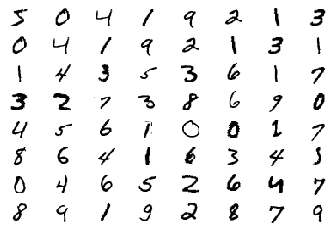

In [30]:
fig, ax = plt.subplots(nrows=8, ncols=8)
for i in range(8):
    for j in range(8):
        ax[i][j].imshow(x_train[i**3+j], cmap='binary')
        ax[i][j].axis("off")

In [33]:
x_train, x_test = x_train /255.0, x_test / 255.0

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [38]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2929 - accuracy: 0.9145
Epoch 2/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1481 - accuracy: 0.9567
Epoch 3/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1103 - accuracy: 0.9663
Epoch 4/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0907 - accuracy: 0.9717
Epoch 5/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0769 - accuracy: 0.9756


In [39]:
model.evaluate(x_test, y_test, verbose=2)

10000/1 - 0s - loss: 0.0389 - accuracy: 0.9775


[0.07683638922064565, 0.9775]

In [43]:
y_pred = model.predict_classes(x_test)

In [76]:
combinations = list(zip(y_pred, y_test, x_test))
misses = [(pred, draw) for pred, real, draw in combinations if pred != real]

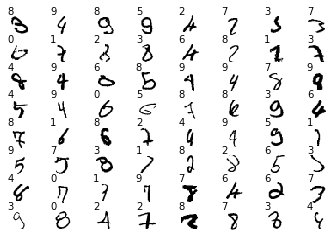

In [95]:
fig, ax = plt.subplots(nrows=8, ncols=8)
c = 0
for i in range(8):
    for j in range(8):
        pred, im = misses[c]
        c += 1
        ax[i][j].imshow(im, cmap='binary')
        ax[i][j].axis("off")
        ax[i][j].annotate(pred, (0,0))

Can you blame m?

## Our Second Neural Network - MNIST clothes

In [97]:
from tensorflow import keras
print(tf.__version__)

2.0.0


In [98]:
fashion_mnist = keras.datasets.fashion_mnist

In [99]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [108]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

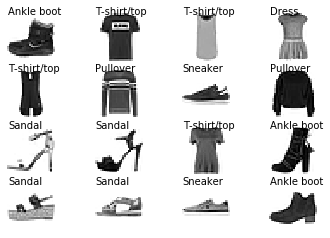

In [109]:
fig, ax = plt.subplots(nrows=4, ncols=4)
im = 0
for i in range(4):
    for j in range(4):
        ax[i][j].imshow(train_images[im], cmap='binary')
        ax[i][j].axis("off")
        ax[i][j].annotate(class_names[train_labels[im]], (0,0))
        im += 1

In [114]:
train_images, test_images = train_images/255.0, test_images/255.0

### Let's build the model again.

In [119]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [120]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 39us/sample - loss: 1.1244 - accuracy: 0.6382
Epoch 2/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.6795 - accuracy: 0.7523
Epoch 3/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.5990 - accuracy: 0.7817
Epoch 4/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.5557 - accuracy: 0.8012
Epoch 5/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.5204 - accuracy: 0.8141
Epoch 6/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.4968 - accuracy: 0.8231
Epoch 7/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4774 - accuracy: 0.8296
Epoch 8/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4625 - accuracy: 0.8344
Epoch 9/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4510 - accuracy: 0.8388s - loss: 0.450

In [121]:
model.evaluate(test_images, test_labels, verbose=2)

10000/1 - 0s - loss: 0.3521 - accuracy: 0.8356


[0.44736991996765135, 0.8356]

In [123]:
y_pred = model.predict_classes(test_images)

In [125]:
combinations = list(zip(test_labels, y_pred, test_images))
misses = [(prediction, image) for real, prediction, image in combinations if real != prediction]

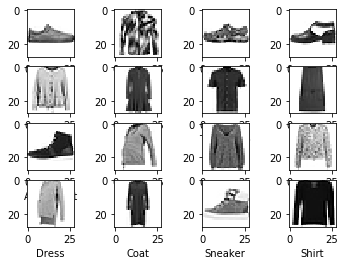

In [130]:
m = 0
fig, ax = plt.subplots(nrows=4, ncols=4)
for i in range(4):
    for j in range(4):
        ax[i][j].imshow(misses[m][1], cmap='binary')
#         ax[i][j].axis("off")
        ax[i][j].set_xlabel(class_names[misses[m][0]])
        m += 1